In [595]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [596]:
# Reading the dataframe
file_path = 'C:/Users/15199/DSI/rk_team_project/Data/Raw/rawdata.csv'
stroke_df = pd.read_csv(file_path)
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [597]:
stroke_df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [598]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [599]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [600]:
duplicate_count = stroke_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


# Stroke vs predictors

In [601]:
# First part: Create subplots (4 rows, 2 columns)
fig1 = make_subplots(rows=2, cols=2, 
                     subplot_titles=("Age vs Stroke", 
                                     "BMI vs Stroke", 
                                     "Avg Glucose Level vs Stroke", 
                                     "Residence Type vs Stroke"), 
                     row_heights=[0.5, 0.5],
                     column_widths=[0.25, 0.25])

fig1.update_layout(
    title_text="Visualizing Stroke vs First Set of Predictors", 
    height=1200,  # Increase height if necessary
    width=500,   # Adjust width as needed
    showlegend=False,
    bargap=0.15, 
    barmode='stack',
    title_x=0.5
)

# ---- Plot 1: Age vs Stroke (Histogram) ----
plot1 = go.Histogram(x=stroke_df[stroke_df['stroke'] == 0]['age'], 
                            name="No Stroke", marker_color='blue')
plot_1 = go.Histogram(x=stroke_df[stroke_df['stroke'] == 1]['age'], 
                            name="Stroke", marker_color='red')

fig1.add_trace(plot1, row=1, col=1)
fig1.add_trace(plot_1, row=1, col=1)

# ---- Plot 2: BMI vs Stroke (Box Plot) ----
plot2 = go.Violin(y=stroke_df[stroke_df['stroke'] == 0]['bmi'], 
                      name="No Stroke", marker_color='blue', box_visible=True, opacity=0.7)
plot_2 = go.Violin(y=stroke_df[stroke_df['stroke'] == 1]['bmi'], 
                      name="Stroke", marker_color='red', box_visible=True, opacity=0.7)

fig1.add_trace(plot2, row=1, col=2)
fig1.add_trace(plot_2, row=1, col=2)

# ---- Plot 3: Avg Glucose Level vs Stroke (Box Plot) ----
plot3 = go.Box(y=stroke_df[stroke_df['stroke'] == 0]['avg_glucose_level'], 
                      name="No Stroke", marker_color='blue')
plot_3 = go.Box(y=stroke_df[stroke_df['stroke'] == 1]['avg_glucose_level'], 
                      name="Stroke", marker_color='red')

fig1.add_trace(plot3, row=2, col=1)
fig1.add_trace(plot_3, row=2, col=1)

# ---- Plot 4: Residence Type vs Stroke (Bar Plot) ----
plot4 = go.Bar(x=stroke_df[stroke_df['stroke'] == 0]['Residence_type'].value_counts().index,
                      y=stroke_df[stroke_df['stroke'] == 0]['Residence_type'].value_counts(), 
                      name="No Stroke", marker_color='blue', width=0.4)

plot_4 = go.Bar(x=stroke_df[stroke_df['stroke'] == 1]['Residence_type'].value_counts().index,
                      y=stroke_df[stroke_df['stroke'] == 1]['Residence_type'].value_counts(), 
                      name="Stroke", marker_color='red', width=0.4)

fig1.add_trace(plot4, row=2, col=2)
fig1.add_trace(plot_4, row=2, col=2)

# ---- Update Layout for First 4 Plots ----
fig1.update_layout(title_text="Visualizing Stroke vs First Set of Predictors", height=1000, width=1200, 
                  showlegend=False,
                  bargap=0.15, # space between bars within a group
                  barmode='stack',  # to stack the bars for better visibility
                  title_x=0.5)  # center the title

# Show the first part
fig1.show()


In [602]:
# Second part: Create subplots (4 rows, 2 columns)
fig2 = make_subplots(rows=2, cols=2, 
                     subplot_titles=("Work Type vs Stroke", 
                                     "Ever Married vs Stroke", 
                                     "Smoking Status vs Stroke", 
                                     "Gender vs Stroke"), 
                     row_heights=[0.5, 0.5],
                     column_widths=[0.25, 0.25])

fig1.update_layout(
    title_text="Visualizing Stroke vs First Set of Predictors", 
    height=1000,  # Increase height if necessary
    width=500,   # Adjust width as needed
    showlegend=False,
    bargap=0.15, 
    barmode='stack',
    title_x=0.5
)

# ---- Plot 5: Work Type vs Stroke (Bar Plot) ----
plot5 = go.Bar(x=stroke_df[stroke_df['stroke'] == 0]['work_type'].value_counts().index,
                      y=stroke_df[stroke_df['stroke'] == 0]['work_type'].value_counts(), 
                      name="No Stroke", marker_color='blue', width=0.4)
plot_5 = go.Bar(x=stroke_df[stroke_df['stroke'] == 1]['work_type'].value_counts().index,
                      y=stroke_df[stroke_df['stroke'] == 1]['work_type'].value_counts(), 
                      name="Stroke", marker_color='red', width=0.4)

fig2.add_trace(plot5, row=1, col=1)
fig2.add_trace(plot_5, row=1, col=1)

# ---- Plot 6: Ever Married vs Stroke (Bar Plot) ----
plot6 = go.Bar(x=stroke_df[stroke_df['stroke'] == 0]['ever_married'].value_counts().index,
                      y=stroke_df[stroke_df['stroke'] == 0]['ever_married'].value_counts(), 
                      name="No Stroke", marker_color='blue', width=0.4)
plot_6 = go.Bar(x=stroke_df[stroke_df['stroke'] == 1]['ever_married'].value_counts().index,
                      y=stroke_df[stroke_df['stroke'] == 1]['ever_married'].value_counts(), 
                      name="Stroke", marker_color='red', width=0.4)

fig2.add_trace(plot6, row=1, col=2)
fig2.add_trace(plot_6, row=1, col=2)

# ---- Plot 7: Smoking Status vs Stroke (Bar Plot) ----
plot7 = go.Bar(x=stroke_df[stroke_df['stroke'] == 0]['smoking_status'].value_counts().index,
                      y=stroke_df[stroke_df['stroke'] == 0]['smoking_status'].value_counts(), 
                      name="No Stroke", marker_color='blue', width=0.4)
plot_7 = go.Bar(x=stroke_df[stroke_df['stroke'] == 1]['smoking_status'].value_counts().index,
                      y=stroke_df[stroke_df['stroke'] == 1]['smoking_status'].value_counts(), 
                      name="Stroke", marker_color='red', width=0.4)

fig2.add_trace(plot7, row=2, col=1)
fig2.add_trace(plot_7, row=2, col=1)

# ---- Plot 8: Gender vs Stroke (Bar Plot) ----
plot8 = go.Bar(x=stroke_df[stroke_df['stroke'] == 0]['gender'].value_counts().index,
                      y=stroke_df[stroke_df['stroke'] == 0]['gender'].value_counts(), 
                      name="No Stroke", marker_color='blue', width=0.4)
plot_8 = go.Bar(x=stroke_df[stroke_df['stroke'] == 1]['gender'].value_counts().index,
                      y=stroke_df[stroke_df['stroke'] == 1]['gender'].value_counts(), 
                      name="Stroke", marker_color='red', width=0.4)

fig2.add_trace(plot8, row=2, col=2)
fig2.add_trace(plot_8, row=2, col=2)

# ---- Update Layout for Second 4 Plots ----
fig2.update_layout(title_text="Visualizing Stroke vs Second Set of Predictors", height=1000, width=1200, 
                  showlegend=False,
                  bargap=0.15, # space between bars within a group
                  barmode='stack',  # to stack the bars for better visibility
                  title_x=0.5)  # center the title

# Show the second part
fig2.show()


In [603]:
import plotly.graph_objects as go

fig3 = go.Figure()

plot = go.Violin(
    y=stroke_df[stroke_df['stroke'] == 0]['age'],
    name='No Stroke',
    legendgroup='No Stroke',
    scalegroup='stroke',
    side='both',  # Show both sides of the violin
    line_color='black',
    fillcolor='rgba(0, 0, 139, 0.9)',  # Dark blue
    opacity=0.9,
    box_visible=True,  # Show boxplot inside
    meanline_visible=False
)

fig3.add_trace(plot)

plot_a = go.Violin(
    y=stroke_df[stroke_df['stroke'] == 1]['age'],
    name='Stroke',
    legendgroup='Stroke',
    scalegroup='stroke',
    side='both',  # Show both sides of the violin
    line_color='black',
    fillcolor='rgba(139, 69, 19, 0.9)',  # Dark brown
    box_visible=True,  # Show boxplot inside
    meanline_visible=False
)

fig3.add_trace(plot_a)

# Layout updates
fig3.update_layout(
    title=dict(
        text="Age Distribution by Stroke Status",
        x=0.5,  # Centers the title
        xanchor="center"
    ),
    xaxis_title="Stroke Status",
    yaxis_title="Age",
    violingap=0,
    width=700, height=700,
    font=dict(family="Arial", size=14, color="black"),
    legend=dict(
        title="Stroke Category",
        orientation="v",  # Vertical legend
        x=1,  # Move legend to the right
        xanchor="left",
        y=1,  # Align legend to the top
        yanchor="top"
    ),
    hovermode="x unified",  # Enhanced hover effect
    template="plotly_white"  # Clean background
)

fig3.show()


In [604]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots (4 rows, 2 columns)
fig2 = make_subplots(rows=2, cols=2, 
                     subplot_titles=("Age vs Hypertension", 
                                     "BMI vs Hypertension", 
                                     "Avg Glucose Level vs Hypertension", 
                                     "Residence Type vs Hypertension"), 
                     row_heights=[0.5, 0.5],
                     column_widths=[0.25, 0.25])

fig2.update_layout(
    title_text="Visualizing Hypertension vs First Set of Predictors", 
    height=1200,  # Increase height if necessary
    width=1000,   # Adjust width as needed
    showlegend=False,
    bargap=0.15, 
    barmode='stack',
    title_x=0.5
)

# ---- Plot 1: Age vs Hypertension (Histogram) ----
plot1 = go.Histogram(x=stroke_df[stroke_df['hypertension'] == 0]['age'], 
                            name="No Hypertension", marker_color='blue')
plot_1 = go.Histogram(x=stroke_df[stroke_df['hypertension'] == 1]['age'], 
                            name="Hypertension", marker_color='red')

fig2.add_trace(plot1, row=1, col=1)
fig2.add_trace(plot_1, row=1, col=1)

# ---- Plot 2: BMI vs Hypertension (Violin Plot) ----
plot2 = go.Violin(y=stroke_df[stroke_df['hypertension'] == 0]['bmi'], 
                      name="No Hypertension", marker_color='blue', box_visible=True, opacity=0.7)
plot_2 = go.Violin(y=stroke_df[stroke_df['hypertension'] == 1]['bmi'], 
                      name="Hypertension", marker_color='red', box_visible=True, opacity=0.7)

fig2.add_trace(plot2, row=1, col=2)
fig2.add_trace(plot_2, row=1, col=2)

# ---- Plot 3: Avg Glucose Level vs Hypertension (Box Plot) ----
plot3 = go.Box(y=stroke_df[stroke_df['hypertension'] == 0]['avg_glucose_level'], 
                      name="No Hypertension", marker_color='blue')
plot_3 = go.Box(y=stroke_df[stroke_df['hypertension'] == 1]['avg_glucose_level'], 
                      name="Hypertension", marker_color='red')

fig2.add_trace(plot3, row=2, col=1)
fig2.add_trace(plot_3, row=2, col=1)

# ---- Plot 4: Residence Type vs Hypertension (Bar Plot) ----
plot4 = go.Bar(x=stroke_df[stroke_df['hypertension'] == 0]['Residence_type'].value_counts().index,
                      y=stroke_df[stroke_df['hypertension'] == 0]['Residence_type'].value_counts(), 
                      name="No Hypertension", marker_color='blue', width=0.4)

plot_4 = go.Bar(x=stroke_df[stroke_df['hypertension'] == 1]['Residence_type'].value_counts().index,
                      y=stroke_df[stroke_df['hypertension'] == 1]['Residence_type'].value_counts(), 
                      name="Hypertension", marker_color='red', width=0.4)

fig2.add_trace(plot4, row=2, col=2)
fig2.add_trace(plot_4, row=2, col=2)

# ---- Update Layout for Second Set of Plots ----
fig2.update_layout(title_text="Visualizing Hypertension vs First Set of Predictors", height=1000, width=1200, 
                  showlegend=False,
                  bargap=0.15, # space between bars within a group
                  barmode='stack',  # to stack the bars for better visibility
                  title_x=0.5)  # center the title

# Show the second set of visualizations
fig2.show()



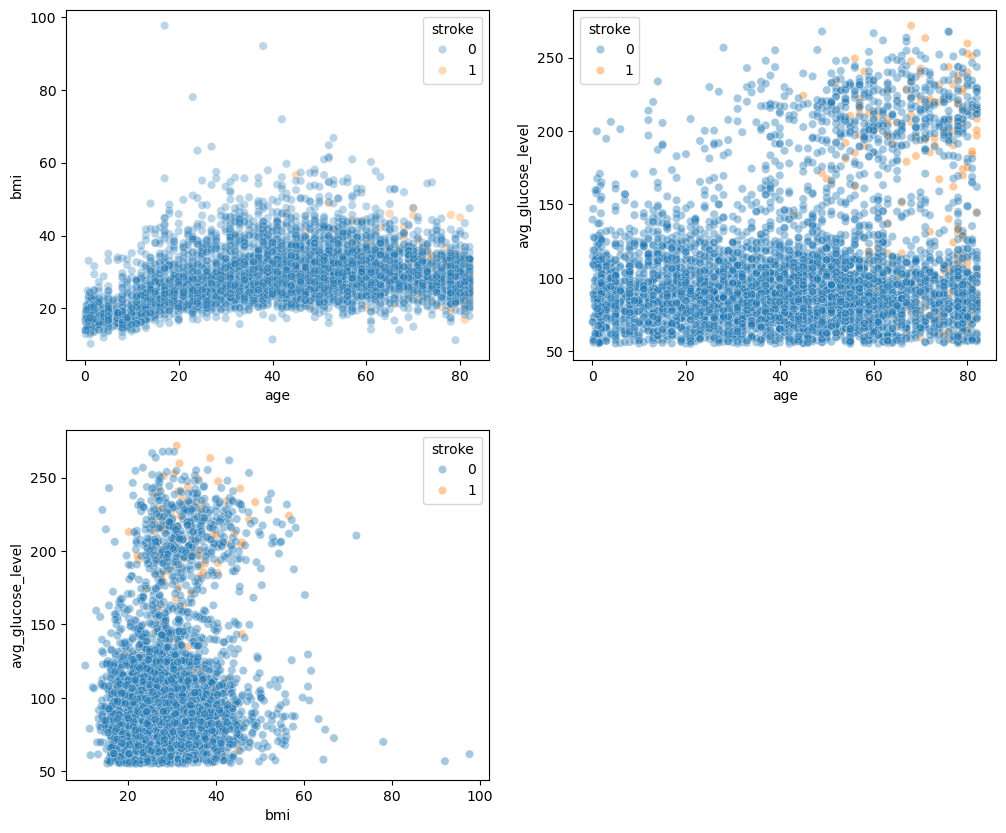

In [605]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot between age and bmi to see correlation
sns.scatterplot(data = stroke_df,
                x = 'age',
                y = 'bmi',
                hue = 'stroke',
                alpha = 0.3,
                ax = ax[0,0]
                )

# Scatter plot between age and avg_glucose_level to see correlation
sns.scatterplot(data = stroke_df,
                x = 'age',
                y = 'avg_glucose_level',
                hue = 'stroke',
                alpha = 0.4,
                ax = ax[0,1]
                )

# Scatter plot between bmi and avg_glucose_level to see correlation
sns.scatterplot(data = stroke_df,
                x = 'bmi',
                y = 'avg_glucose_level',
                hue = 'stroke',
                alpha = 0.4,
                ax = ax[1,0]
                )

fig.delaxes(ax[1, 1])

In [606]:
fig2 = go.Figure()

fig2 = make_subplots(rows=2, cols=4, subplot_titles=["Stroke", "Hypertension", "Heart Disease", "Gender", "Ever Married", "Work Type", "Residence Type", "Smoking Status"], 
                    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}], [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

label_1 = ['No Stroke', 'Stroke']
label_2 = ['No Hypertension', 'Hypertension']
label_3 = ['No Heart Disease', 'Heart Disease']
label_4 = ['Female', 'Male']

fig2.add_trace(go.Pie(labels=label_1, values=stroke_df['stroke'].value_counts(), pull=[0.1, 0.1], textfont_size = 15, marker=dict(colors=['grey', 'red']),
                     insidetextfont=dict(size=14, color='black', weight='bold'),hoverinfo='label+value'), row = 1, col = 1)

fig2.add_trace(go.Pie(labels=label_2, values=stroke_df['hypertension'].value_counts(), pull=[0.05, 0.05], textfont_size = 15, marker=dict(colors=['green', 'orange']),
                     insidetextfont=dict(size=15, color='black', weight='bold'), hoverinfo='label+value'),row = 1, col = 2)

fig2.add_trace(go.Pie(labels=label_3, values=stroke_df['heart_disease'].value_counts(), pull=[0.1, 0.1], textfont_size = 15, marker=dict(colors=['skyblue', 'navyblue']),
                     insidetextfont=dict(size=15, color='black', weight='bold'), hoverinfo='label+value'), row = 1, col = 3)

fig2.add_trace(go.Pie(labels=label_4, values=stroke_df['gender'].value_counts(), pull=[0.02, 0.02], textfont_size = 15, marker=dict(colors=['olive', 'purple']),
                     insidetextfont=dict(size=15, color='black', weight='bold'), hoverinfo='label+value'), row = 1, col = 4)

label_5 = ['Never Married', 'Married']
label_6 = ['Private', 'Self Employed', 'Govt Job']
label_7 = ['Urban', 'Rural']
label_8 = ['Formerly Smoke', 'Never Smoked', 'Smokes', 'Unknown']

fig2.add_trace(go.Pie(labels=label_5, values=stroke_df['ever_married'].value_counts(), pull=[0.02, 0.02], textfont_size = 15, marker=dict(colors=['lightgreen', 'peru']),
                     insidetextfont=dict(size=15, color='black', weight='bold'),hoverinfo='label+value'), row = 2, col = 1)

fig2.add_trace(go.Pie(labels=label_6, values=stroke_df['work_type'].value_counts(), pull=[0.02, 0.02, 0.02], textfont_size = 15, marker=dict(colors=['seagreen', 'saddlebrown']),
                     insidetextfont=dict(size=15, color='black', weight='bold'), hoverinfo='label+value'),row = 2, col = 2)

fig2.add_trace(go.Pie(labels=label_7, values=stroke_df['Residence_type'].value_counts(), pull=[0.02, 0.02], textfont_size = 15, marker=dict(colors=['deepskyblue', 'deeppink']),
                     insidetextfont=dict(size=15, color='black', weight='bold'), hoverinfo='label+value'), row = 2, col = 3)

fig2.add_trace(go.Pie(labels=label_8, values=stroke_df['smoking_status'].value_counts(), pull=[0.02, 0.02, 0.02, 0.02], textfont_size = 15, marker=dict(colors=['crimson', 'yellowgreen']),
                     insidetextfont=dict(size=15, color='black', weight='bold'), hoverinfo='label+value'), row = 2, col = 4)

fig2.update_layout(
    hoverlabel=dict(font_size=15, bgcolor="black"),
    legend=dict(
        x=1,             
        y=1,            
        bgcolor="white", 
        bordercolor="black",  
        borderwidth=2  
    ),
    width = 1500,
    height = 900
)

fig2.show()

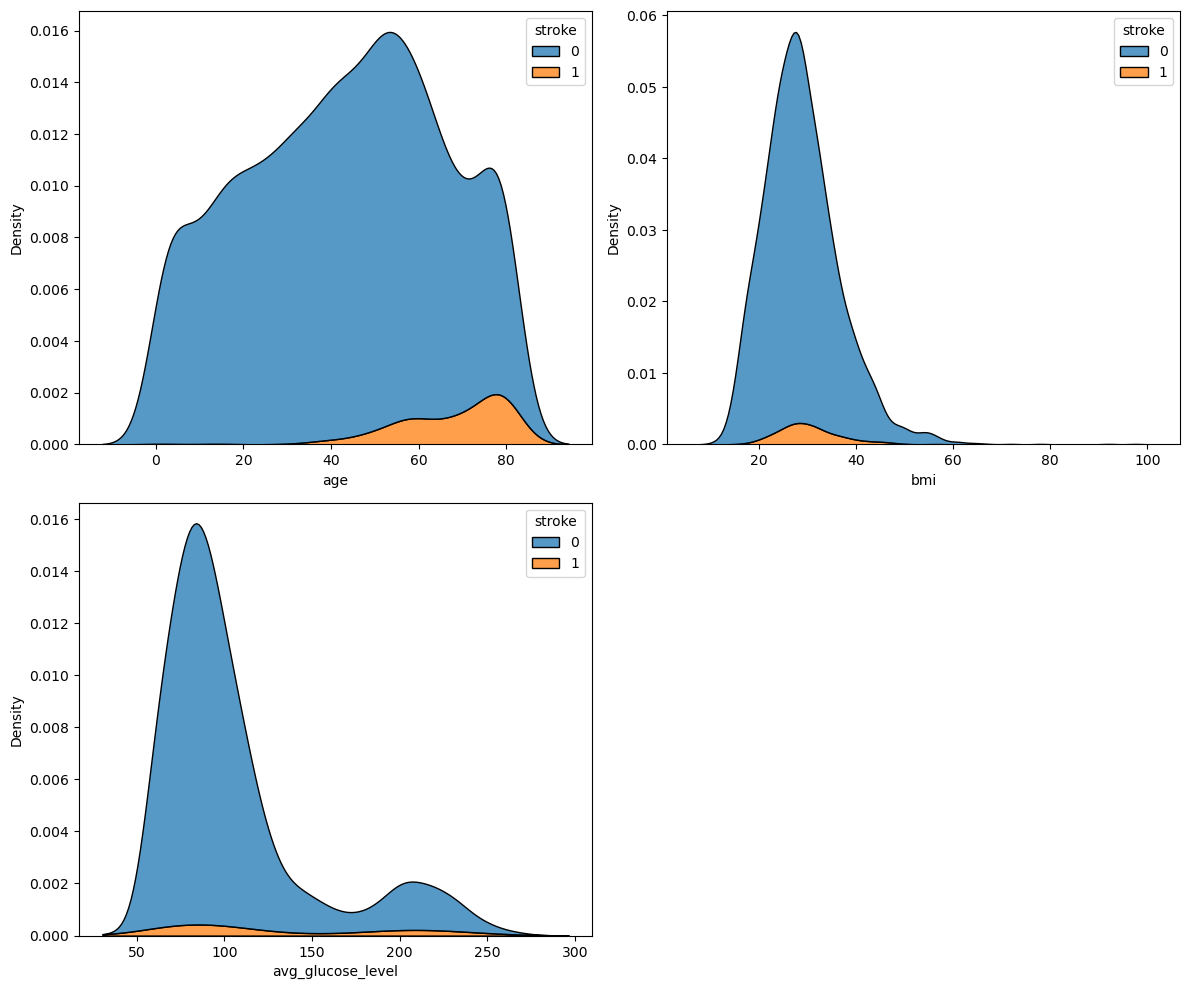

In [607]:
fig1, ax = plt.subplots(2, 2, figsize=(12, 10))

# KDE plot of Age vs Stroke
sns.kdeplot(data=stroke_df, x='age', hue='stroke', ax=ax[0, 0], multiple="stack")

# KDE plot of BMI vs Stroke
sns.kdeplot(data=stroke_df, x='bmi', hue='stroke', ax=ax[0, 1], multiple="stack")

# KDE plot of Avg Glucose Level vs Stroke
sns.kdeplot(data=stroke_df, x='avg_glucose_level', hue='stroke', ax=ax[1, 0], multiple="stack")

# Remove empty subplot (bottom-right)
fig1.delaxes(ax[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()

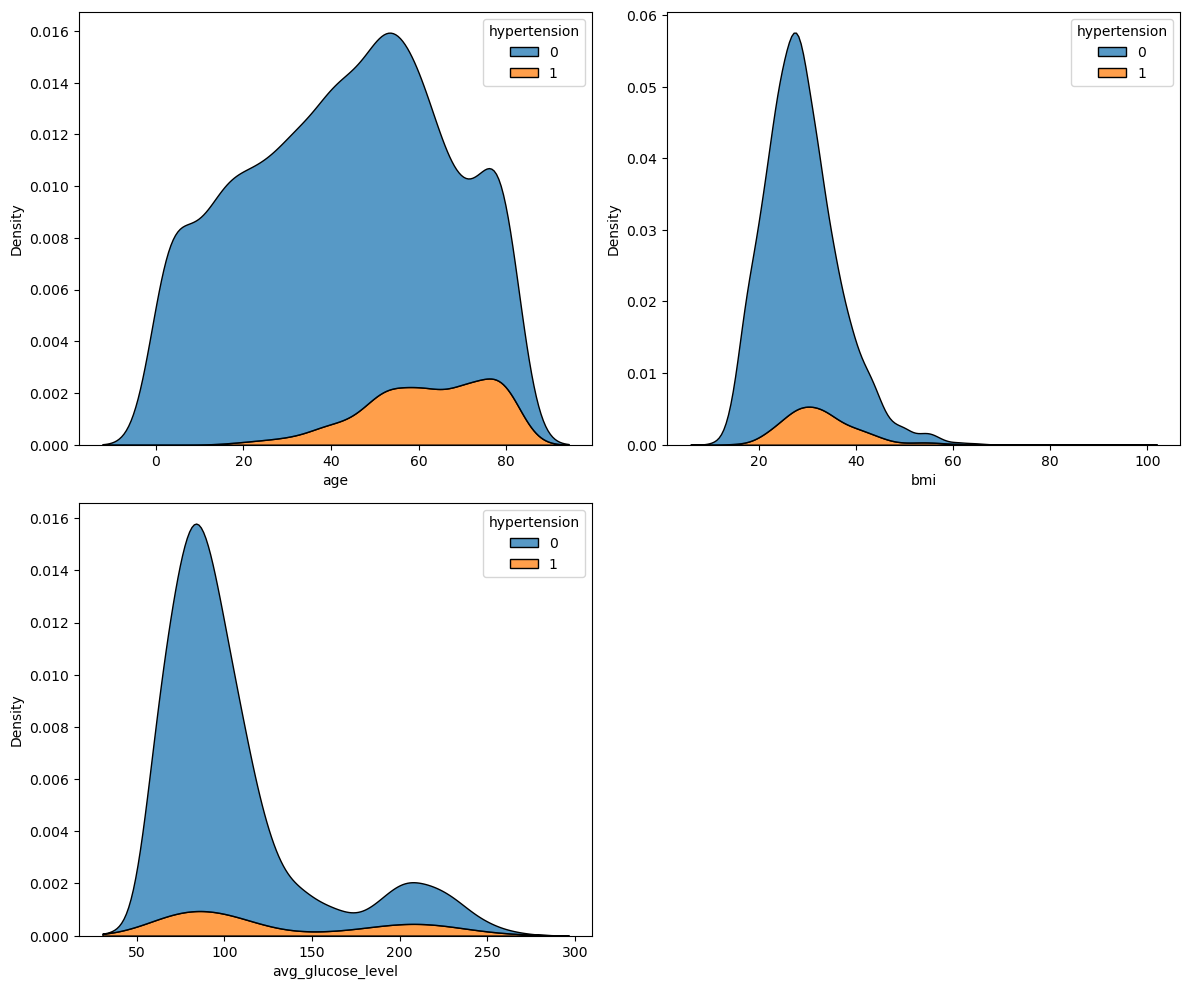

In [608]:
fig1, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.kdeplot(data=stroke_df, x='age', hue='hypertension', ax=ax[0, 0], multiple="stack")


sns.kdeplot(data=stroke_df, x='bmi', hue='hypertension', ax=ax[0, 1], multiple="stack")


sns.kdeplot(data=stroke_df, x='avg_glucose_level', hue='hypertension', ax=ax[1, 0], multiple="stack")


fig1.delaxes(ax[1, 1])

plt.tight_layout()
plt.show()

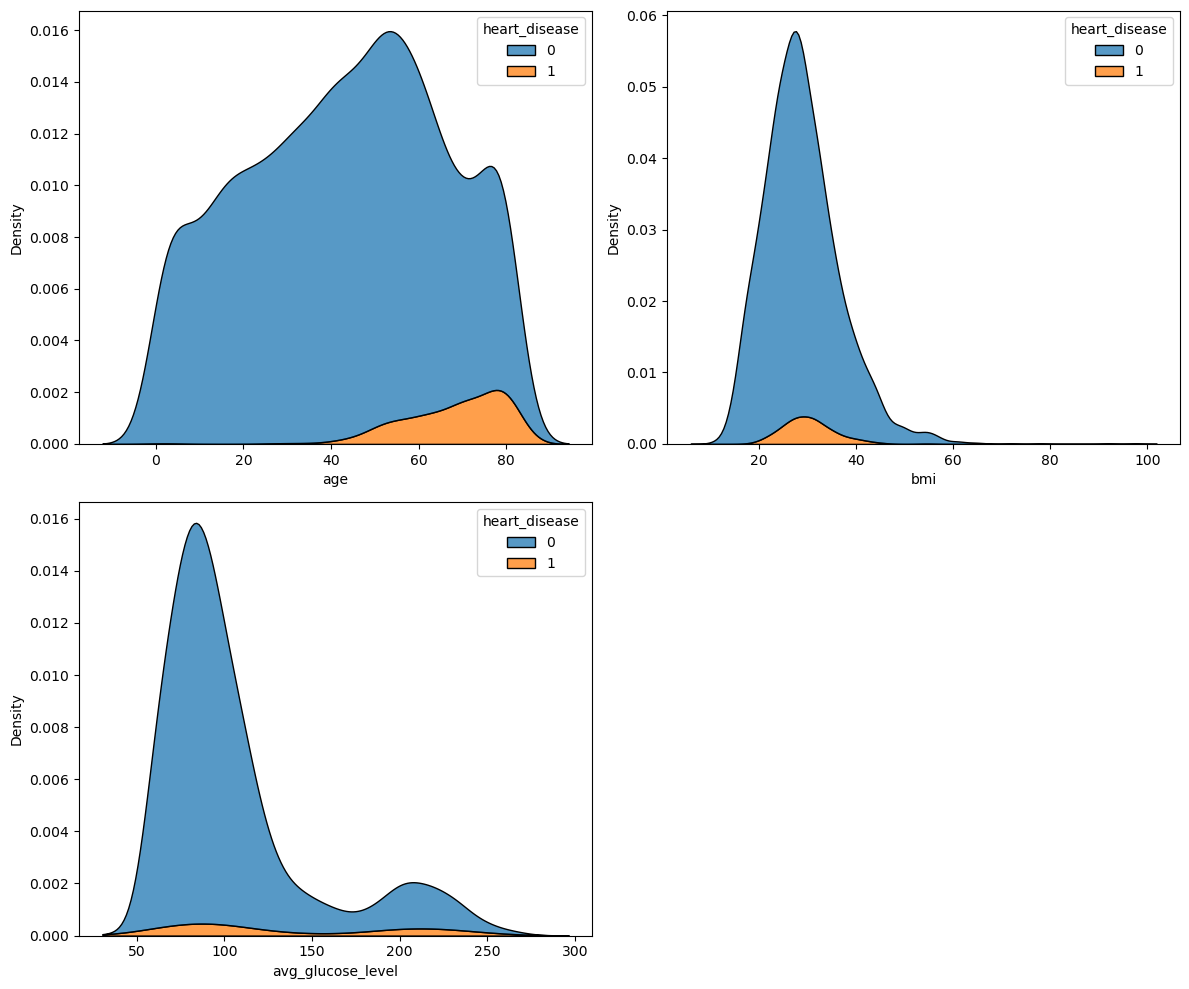

In [609]:
fig1, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.kdeplot(data=stroke_df, x='age', hue='heart_disease', ax=ax[0, 0], multiple="stack")


sns.kdeplot(data=stroke_df, x='bmi', hue='heart_disease', ax=ax[0, 1], multiple="stack")


sns.kdeplot(data=stroke_df, x='avg_glucose_level', hue='heart_disease', ax=ax[1, 0], multiple="stack")


fig1.delaxes(ax[1, 1])

plt.tight_layout()
plt.show()